In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch #might be obsolete
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix
from function_pontius import *
%matplotlib inline

C:\Users\chimp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        #plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('Sample Index or (Cluster Size)',  fontsize=16)
        #plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [3]:
### Load Results ###
#Class 3 Residential
dist_tca3 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/Total Class Area[class 3]_df.csv')
vals_tca3 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/Total Class Area[class 3]_values.csv')

dist_pland3 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND[class 3]_df.csv')
vals_pland3 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND[class 3]_values.csv')

#Class 4 Industrial
dist_tca4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA4_df.csv')
vals_tca4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA4_values.csv')

dist_pland4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND4_df.csv')
vals_pland4 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND4_values.csv')

#Class 8 Semi hardened :: NO CHANGE ::
dist_tca8 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA8_df.csv')
vals_tca8 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA8_values.csv')

dist_pland8 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND8_df.csv')
vals_pland8 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND8_values.csv')

#Class 9 Recreational :: NO CHANGE ::
dist_tca9 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA9_df.csv')
vals_tca9 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA9_values.csv')

dist_pland9 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND9_df.csv')
vals_pland9 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND9_values.csv')

#Class 12 Horticulture :: TWO VALUES ::
dist_tca12 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA12_df.csv')
vals_tca12 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA12_values.csv')

dist_pland12 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND12_df.csv')
vals_pland12 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND12_values.csv')

#Class 14  Potatoes
dist_tca14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA14_df.csv')
vals_tca14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA14_values.csv')

dist_pland14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND14_df.csv')
vals_pland14 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND14_values.csv')

#Class 14  Grains
dist_tca16 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA16_df.csv')
vals_tca16 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA16_values.csv')

dist_pland16 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND16_df.csv')
vals_pland16 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND16_values.csv')

#Class 19  Pasturage
dist_tca19 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA19_df.csv')
vals_tca19 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA19_values.csv')

dist_pland19 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND19_df.csv')
vals_pland19 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND19_values.csv')

#Class 21  Arboriculture
dist_tca21 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA21_df.csv')
vals_tca21 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA21_values.csv')

dist_pland21 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND21_df.csv')
vals_pland21 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND21_values.csv')

#Class 22 Nature
dist_tca22 = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_df.csv')
vals_tca22 = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_values.csv')

dist_pland22 = pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_df.csv')
vals_pland22 =  pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_values.csv')

In [79]:
"""737 different values over 2k maps"""
unique,counts= np.unique(vals_pland22['PLAND[class 22]'], return_counts=True)
pl_d22 = dict(zip(unique, counts))

In [81]:
d22

{665479: 1,
 665480: 109,
 665481: 58,
 665482: 101,
 665483: 397,
 690480: 16,
 690481: 212,
 690482: 132,
 690483: 162,
 690484: 122,
 690485: 23,
 721481: 171,
 721482: 21,
 721483: 295,
 721484: 180}

In [80]:
pl_d22

{17.96151068224046: 1,
 17.961537672589788: 109,
 17.961564662939118: 58,
 17.96159165328845: 101,
 17.96161864363778: 397,
 18.636296405857124: 16,
 18.636323396206453: 212,
 18.636350386555787: 132,
 18.636377376905113: 162,
 18.636404367254446: 122,
 18.636431357603772: 23,
 19.473024225457944: 171,
 19.47305121580728: 21,
 19.473078206156607: 295,
 19.473105196505934: 180}

In [85]:
"""47 different values over 2k maps"""
unique,counts= np.unique(vals_tca3['Total Class Area[class 3]'], return_counts=True)
d3 = dict(zip(unique, counts))

"""737 different values over 2k maps"""
unique,counts= np.unique(vals_tca4['TCA4'], return_counts=True)
d4 = dict(zip(unique, counts))


"""Only two different values"""
# unique,counts= np.unique(vals_tca12['TCA12'], return_counts=True)
# d12 = dict(zip(unique, counts))

"""Little patterns, 1600 different values over 2k maps"""
unique,counts= np.unique(vals_tca14['TCA14'], return_counts=True)
d14 = dict(zip(unique, counts))

"""Little patterns, 1743 different values over 2k maps"""
unique,counts= np.unique(vals_tca16['TCA16'], return_counts=True)
d16 = dict(zip(unique, counts))

"""Little patterns, 1866 different values over 2k maps"""
unique,counts= np.unique(vals_tca19['TCA19'], return_counts=True)
d19 = dict(zip(unique, counts))

"""Only two different values"""
unique,counts= np.unique(vals_tca21['TCA21'], return_counts=True)
d21 = dict(zip(unique, counts))

"""15 different values"""
unique,counts= np.unique(vals_tca22['Total Class Area[class 22]'], return_counts=True)
d22 = dict(zip(unique, counts))
d22

{665479: 1,
 665480: 109,
 665481: 58,
 665482: 101,
 665483: 397,
 690480: 16,
 690481: 212,
 690482: 132,
 690483: 162,
 690484: 122,
 690485: 23,
 721481: 171,
 721482: 21,
 721483: 295,
 721484: 180}

In [12]:
unique,counts= np.unique(vals_tca['Total Class Area[class 22]'], return_counts=True)
d = dict(zip(unique, counts))
d

{665479: 1,
 665480: 109,
 665481: 58,
 665482: 101,
 665483: 397,
 690480: 16,
 690481: 212,
 690482: 132,
 690483: 162,
 690484: 122,
 690485: 23,
 721481: 171,
 721482: 21,
 721483: 295,
 721484: 180}

In [86]:
len(d16.values())

1743

In [14]:
vals_tca.describe()

,Total Class Area[class 22]
count,2000.000000
mean,692495.916500
std,22909.323746
min,665479.000000
25%,665483.000000
50%,690482.000000
75%,721481.000000
max,721484.000000


In [15]:
dist_pland.describe()

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map1990,map1991,map1992,map1993,map1994,map1995,map1996,map1997,map1998,map1999
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.729103,0.503752,0.503755,0.503752,0.729103,0.729145,0.729123,0.503755,0.782376,0.729123,...,0.782399,0.729123,0.503755,0.503750,0.503749,0.729145,0.782399,0.782362,0.782399,0.503752
std,0.618313,0.362490,0.362474,0.362490,0.618313,0.618327,0.618322,0.362474,0.618325,0.618322,...,0.618331,0.618322,0.362474,0.362485,0.362490,0.618327,0.618331,0.618308,0.618331,0.362490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000054,0.000054,0.000081,0.000054,0.000054,0.000054,0.000027,0.000081,0.000054,0.000027,...,0.000081,0.000027,0.000081,0.000054,0.000027,0.000054,0.000081,0.000054,0.000081,0.000054
50%,0.674732,0.674705,0.674786,0.674705,0.674732,0.674786,0.674759,0.674786,0.836728,0.674759,...,0.836755,0.674759,0.674786,0.674759,0.674732,0.674786,0.836755,0.836701,0.836755,0.674705
75%,1.511406,0.836701,0.836620,0.836701,1.511406,1.511460,1.511433,0.836620,1.511460,1.511433,...,1.511487,1.511433,0.836620,0.836647,0.836674,1.511460,1.511487,1.511433,1.511487,0.836701
max,1.511487,0.836782,0.836701,0.836782,1.511487,1.511541,1.511514,0.836701,1.511568,1.511514,...,1.511595,1.511514,0.836701,0.836728,0.836755,1.511541,1.511595,1.511541,1.511595,0.836782


<BarContainer object of 1 artists>

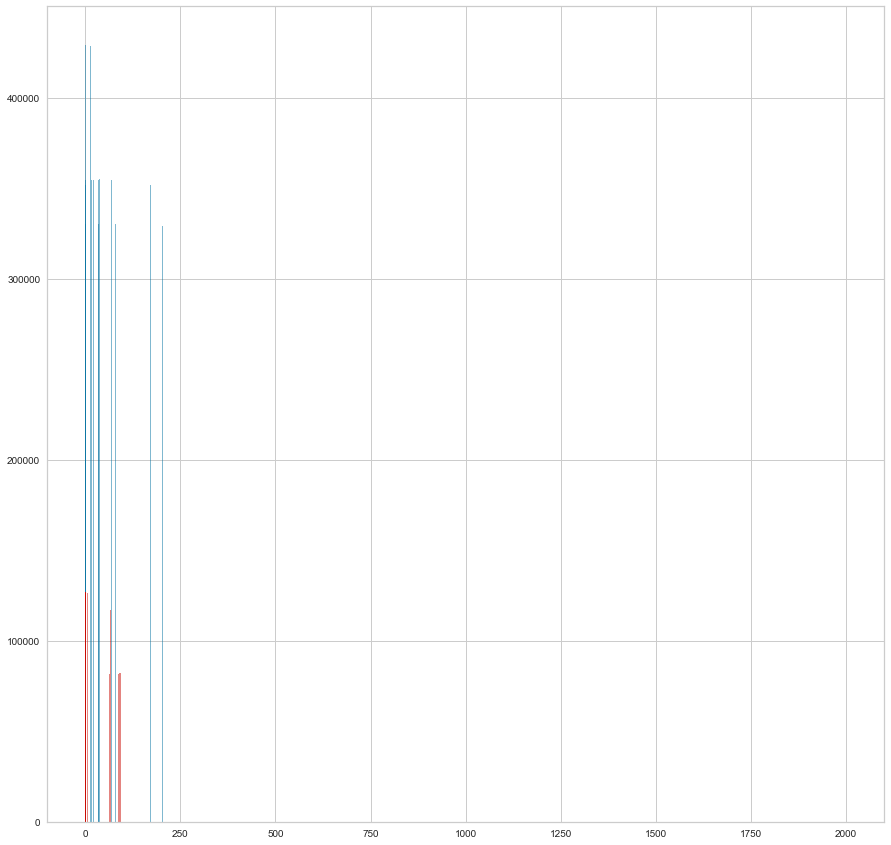

In [43]:
plt.figure(figsize=(15,15)) 
plt.bar(d3.values(), d3.keys(), alpha=0.5, color='b')
plt.bar(d4.values(), d4.keys(), alpha=0.5, color='r')
plt.bar(d8.values(), d8.keys(), alpha=0.5, color='g')
#plt.show()

In [136]:
len(d3.values())

47

In [137]:
len(d4.values())

737

In [138]:
len(d8.values())

1

In [147]:
len(d9.values())

1

In [144]:
len(d12.values())

2

In [145]:
len(d14.values())

1686

In [146]:
len(d16.values())

1743

In [140]:
len(d19.values())

1866

In [141]:
len(d21.values())

2

In [142]:
len(d22.values())

15

# Number of clusters (elbow method)

ValueError: num must be 1 <= num <= 2, not 3

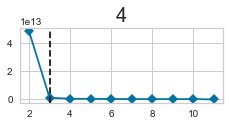

In [98]:
tcaclustering3 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca3)
tcaclustering4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca4)
tcaclustering8 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca8)
tcaclustering9 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca9)
tcaclustering12 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca12)
tcaclustering14 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca14)
tcaclustering16 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca16)
tcaclustering19 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca19)
tcaclustering21 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca21)
tcaclustering22 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca22)

fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 5, 1)
plt.title('3', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(tcaclustering3, k=(2,12), timings=False)
vis_tca3= visualizer.fit(dist_tca3)        # Fit the data to the visualizer

plt.subplot(5, 2, 2)
plt.title('4', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering4, k=(2,12), timings=False)
vis_tca4 = visualizer.fit(dist_tca4)

plt.subplot(2, 1, 3)
plt.title('8', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering8, k=(2,12), timings=False)
vis_tca8 = visualizer.fit(dist_tca8) 

plt.subplot(5, 2, 4)
plt.title('9', fontsize=20)
visualizer = dist_tca12(tcaclustering9, k=(2,12), timings=False)
vis_tca9 = visualizer.fit(dist_tca9) 

plt.subplot(5, 2, 5)
plt.title('12', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering12, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca12) 

plt.subplot(5, 2, 6)
plt.title('14', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(tcaclustering14, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca14)        # Fit the data to the visualizer

plt.subplot(5, 2, 7)
plt.title('16', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering16, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca16) 

plt.subplot(5, 2, 8)
plt.title('19', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering19, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca19) 

plt.subplot(5, 2, 9)
plt.title('21', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering21, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca21) 

plt.subplot(5, 2, 10)
plt.title('22', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering22, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca22) 

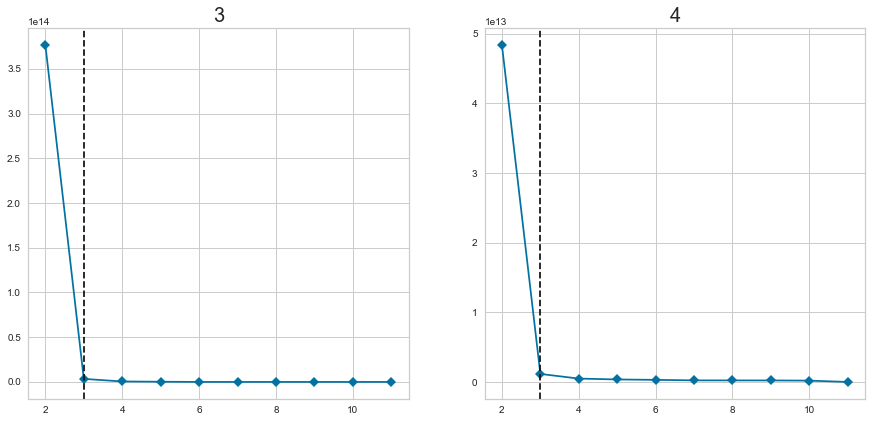

In [110]:
plt.figure(figsize=(15, 15)) 
plt.subplot(2, 2, 1)
plt.title('3', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(tcaclustering3, k=(2,12), timings=False)
vis_tca3= visualizer.fit(dist_tca3)        # Fit the data to the visualizer

plt.subplot(2, 2, 2)
plt.title('4', fontsize=20)
visualizer = KElbowVisualizer(tcaclustering4, k=(2,12), timings=False)
vis_tca4 = visualizer.fit(dist_tca4)

"""No elbow recommendations for classes below"""
# plt.subplot(2, 2, 3)
# plt.title('8', fontsize=20)
# visualizer = KElbowVisualizer(tcaclustering8, k=(2,12), timings=False)
# vis_tca8 = visualizer.fit(dist_tca8) 

# plt.subplot(2, 2, 4)
# plt.title('9', fontsize=20)
# visualizer = dist_tca12(tcaclustering9, k=(2,12), timings=False)
# vis_tca9 = visualizer.fit(dist_tca9)

C:\Users\chimp\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: RuntimeWarning: invalid value encountered in true_divide
  return (a - min(a)) / (max(a) - min(a))
C:\Users\chimp\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
C:\Users\chimp\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:78: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)
C:\Users\chimp\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:77: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
C:\Users\chimp\Anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:78: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)
C:\Users\chimp\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering

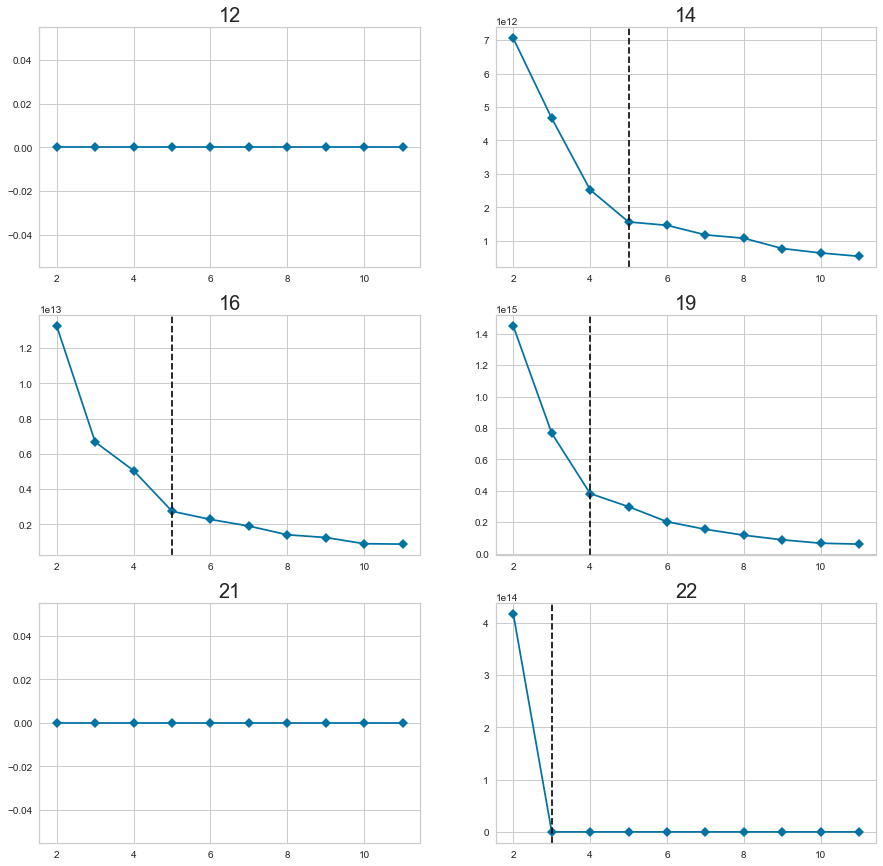

In [114]:
plt.figure(figsize=(15, 15)) 
plt.subplot(3, 2, 1)
plt.title('12', fontsize=20)
visualizer12 = KElbowVisualizer(tcaclustering12, k=(2,12), timings=False)
_ = visualizer12.fit(dist_tca12) 

plt.subplot(3, 2, 2)
plt.title('14', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer14 = KElbowVisualizer(tcaclustering14, k=(2,12), timings=False)
_ = visualizer14.fit(dist_tca14)        # Fit the data to the visualizer

plt.subplot(3, 2, 3)
plt.title('16', fontsize=20)
visualizer16 = KElbowVisualizer(tcaclustering16, k=(2,12), timings=False)
_ = visualizer16.fit(dist_tca16) 

plt.subplot(3, 2, 4)
plt.title('19', fontsize=20)
visualizer19 = KElbowVisualizer(tcaclustering19, k=(2,12), timings=False)
_ = visualizer19.fit(dist_tca19) 

plt.subplot(3, 2, 5)
plt.title('21', fontsize=20)
visualizer21 = KElbowVisualizer(tcaclustering21, k=(2,12), timings=False)
_ = visualizer21.fit(dist_tca21) 

plt.subplot(3, 2, 6)
plt.title('22', fontsize=20)
visualizer22 = KElbowVisualizer(tcaclustering22, k=(2,12), timings=False)
_ = visualizer22.fit(dist_tca22) 

# Cluster on found nr of clusters

In [119]:
# Ignore classes with only 1 outcome
tcacluster3 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca3)
tcacluster4 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca4)
#tcaclustering8 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca8)
#tcaclustering9 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca9)
#tcacluster12 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_tca12)
tcacluster14 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_tca14)
tcaclustering16 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_tca16)
tcaclustering19 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca19)
#tcaclustering21 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca21)
tcaclustering22 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca22)

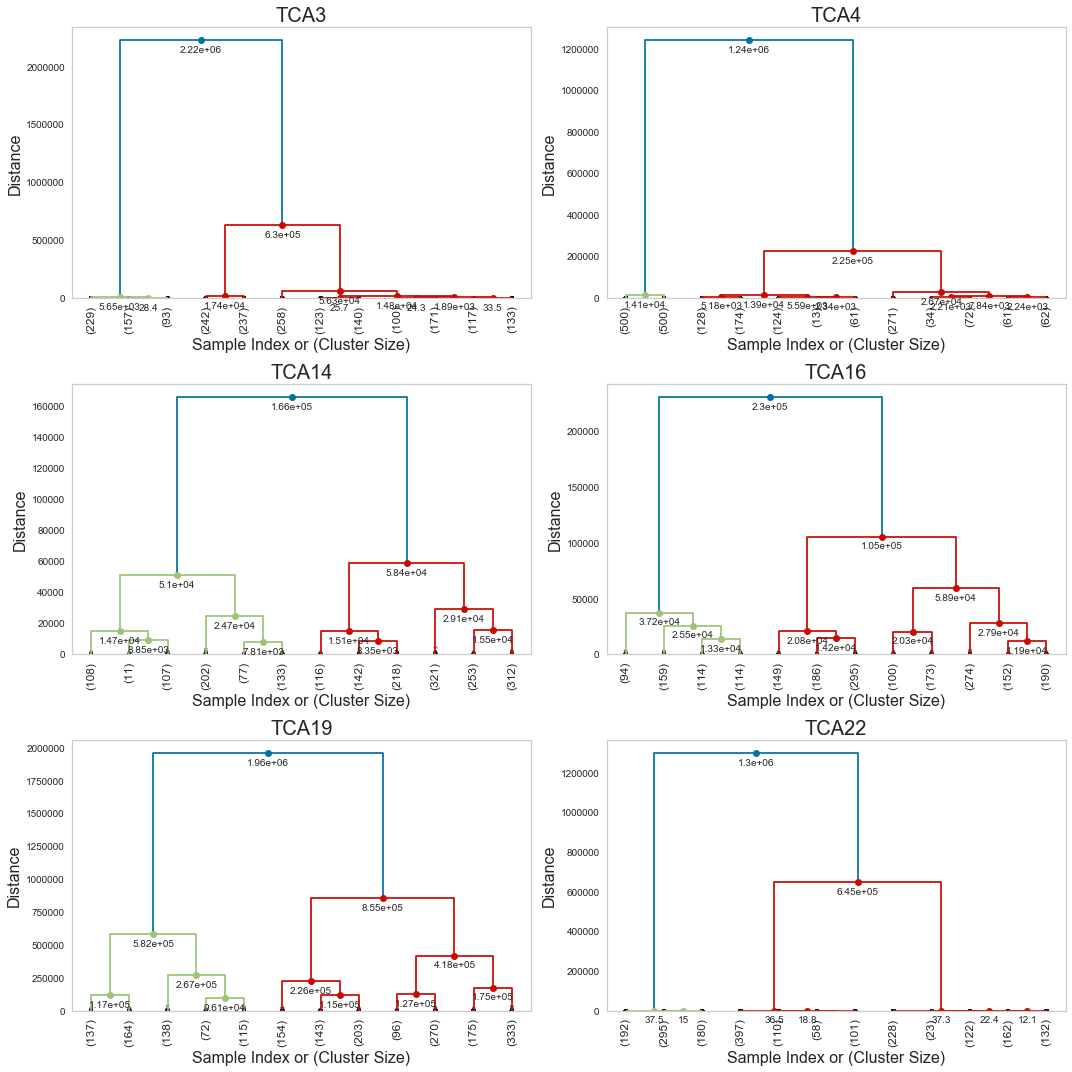

In [131]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
tca3_condensed = squareform(dist_tca3)

fancy_dendrogram(
    sch.linkage(tca3_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca3 = plt.gca()
ax_tca3.grid(False)
plt.title('TCA3', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 2)
tca4_condensed = squareform(dist_tca4)

fancy_dendrogram(
    sch.linkage(tca4_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca4 = plt.gca()
ax_tca4.grid(False)
plt.title('TCA4', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 3)
tca14_condensed = squareform(dist_tca14)

fancy_dendrogram(
    sch.linkage(tca14_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca14 = plt.gca()
ax_tca14.grid(False)
plt.title('TCA14', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 4)
tca16_condensed = squareform(dist_tca16)

fancy_dendrogram(
    sch.linkage(tca16_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca16 = plt.gca()
ax_tca16.grid(False)
plt.title('TCA16', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 5)
tca19_condensed = squareform(dist_tca19)

fancy_dendrogram(
    sch.linkage(tca19_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca19 = plt.gca()
ax_tca19.grid(False)
plt.title('TCA19', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 6)
tca22_condensed = squareform(dist_tca22)

fancy_dendrogram(
    sch.linkage(tca22_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca22 = plt.gca()
ax_tca22.grid(False)
plt.title('TCA22', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.tight_layout()
plt.savefig('E:/thesis_images/tca_compare.png', format='png', bbox_inches='tight')

# Chosen Categories Industrial [4], Potatoes [14], Nature [22]

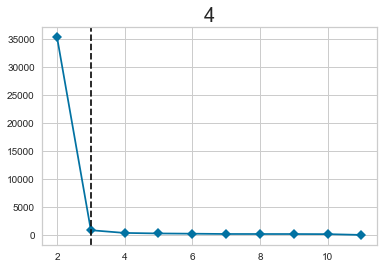

In [16]:
plt.title('4', fontsize=20)
visualizer = KElbowVisualizer(plandclustering4, k=(2,12), timings=False)
vis_tca4 = visualizer.fit(dist_pland4)

In [17]:
# Industrial [4] has medium outcome variance (737)
tcaclustering4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca4)
plandclustering4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_pland4)
# Potatoes [14] has high outcome variance (1686)
tcaclustering14 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca14)
plandclustering14 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_pland14)
# Nature [22] has low outcome variance (15)
tcaclustering22 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca22)
plandclustering22 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_pland22)

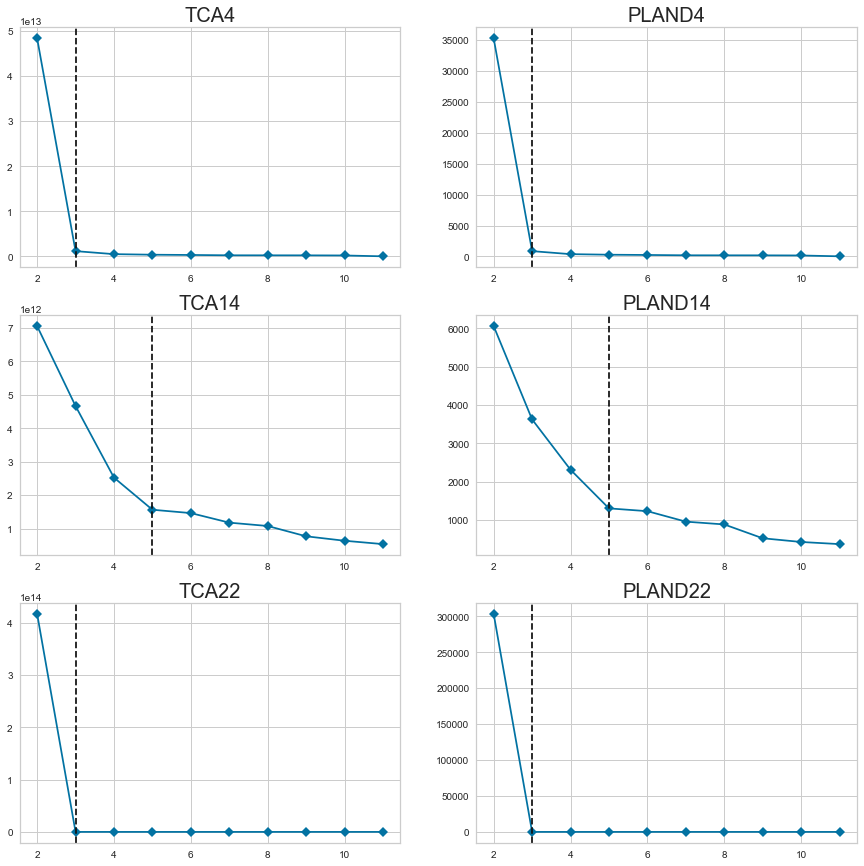

In [20]:
plt.figure(figsize=(15, 15)) 

plt.subplot(3, 2, 1)
plt.title('TCA4', fontsize=20)
tca4_visualizer = KElbowVisualizer(tcaclustering4, k=(2,12), timings=False)
_ = tca4_visualizer.fit(dist_tca4)

plt.subplot(3, 2, 2)
plt.title('PLAND4', fontsize=20)
# Instantiate the clustering model and visualizer
pl4_visualizer = KElbowVisualizer(plandclustering4, k=(2,12), timings=False)
_ = pl4_visualizer.fit(dist_pland4) 

plt.subplot(3, 2, 3)
plt.title('TCA14', fontsize=20)
# Instantiate the clustering model and visualizer
tca14_visualizer = KElbowVisualizer(tcaclustering14, k=(2,12), timings=False)
_ = tca14_visualizer.fit(dist_tca14) 

plt.subplot(3, 2, 4)
plt.title('PLAND14', fontsize=20)
# Instantiate the clustering model and visualizer
pl14_visualizer = KElbowVisualizer(plandclustering14, k=(2,12), timings=False)
_ = pl14_visualizer.fit(dist_pland14) 

plt.subplot(3, 2, 5)
plt.title('TCA22', fontsize=20)
tca22_visualizer = KElbowVisualizer(tcaclustering22, k=(2,12), timings=False)
_ = tca22_visualizer.fit(dist_tca22) 

plt.subplot(3, 2, 6)
plt.title('PLAND22', fontsize=20)
pl22_visualizer = KElbowVisualizer(plandclustering22, k=(2,12), timings=False)
_ = pl22_visualizer.fit(dist_pland22) 

In [26]:
"""Cluster again on the newly found 'optimal' number"""
tcacluster4 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca4)
tcacluster14 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_tca14)
tcacluster22 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca22)
plandcluster4 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_pland4)
plandcluster14 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_pland14)
plandcluster22 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_pland22)

labels_tca4 = tcacluster4.labels_
labels_tca14 = tcacluster14.labels_
labels_tca22 = tcacluster22.labels_
labels_pland4 = plandcluster4.labels_
labels_pland14 = plandcluster14.labels_
labels_pland22 = plandcluster22.labels_

sil_tca4 = metrics.silhouette_score(dist_tca4, labels_tca4, metric='euclidean')
sil_tca14 = metrics.silhouette_score(dist_tca14, labels_tca14, metric='euclidean')
sil_tca22 = metrics.silhouette_score(dist_tca22, labels_tca22, metric='euclidean')
sil_pland4 = metrics.silhouette_score(dist_pland4, labels_tca4, metric='euclidean')
sil_pland14 = metrics.silhouette_score(dist_pland14, labels_tca14, metric='euclidean')
sil_pland22 = metrics.silhouette_score(dist_pland22, labels_tca22, metric='euclidean')
print(f'TCA4 score is {sil_tca4:.3f}\nTCA14 score is {sil_tca14:.3f}\nTCA22 score is {sil_tca22:.3f}\nPLAND4 score is {sil_pland4:.3f}\nPLAND14 score is {sil_pland14:.3f} \
        \nPLAND22 score is {sil_pland22:.3f}')

TCA4 score is 0.957
TCA14 score is 0.552
TCA22 score is 1.000
PLAND4 score is 0.957
PLAND14 score is 0.552         
PLAND22 score is 1.000


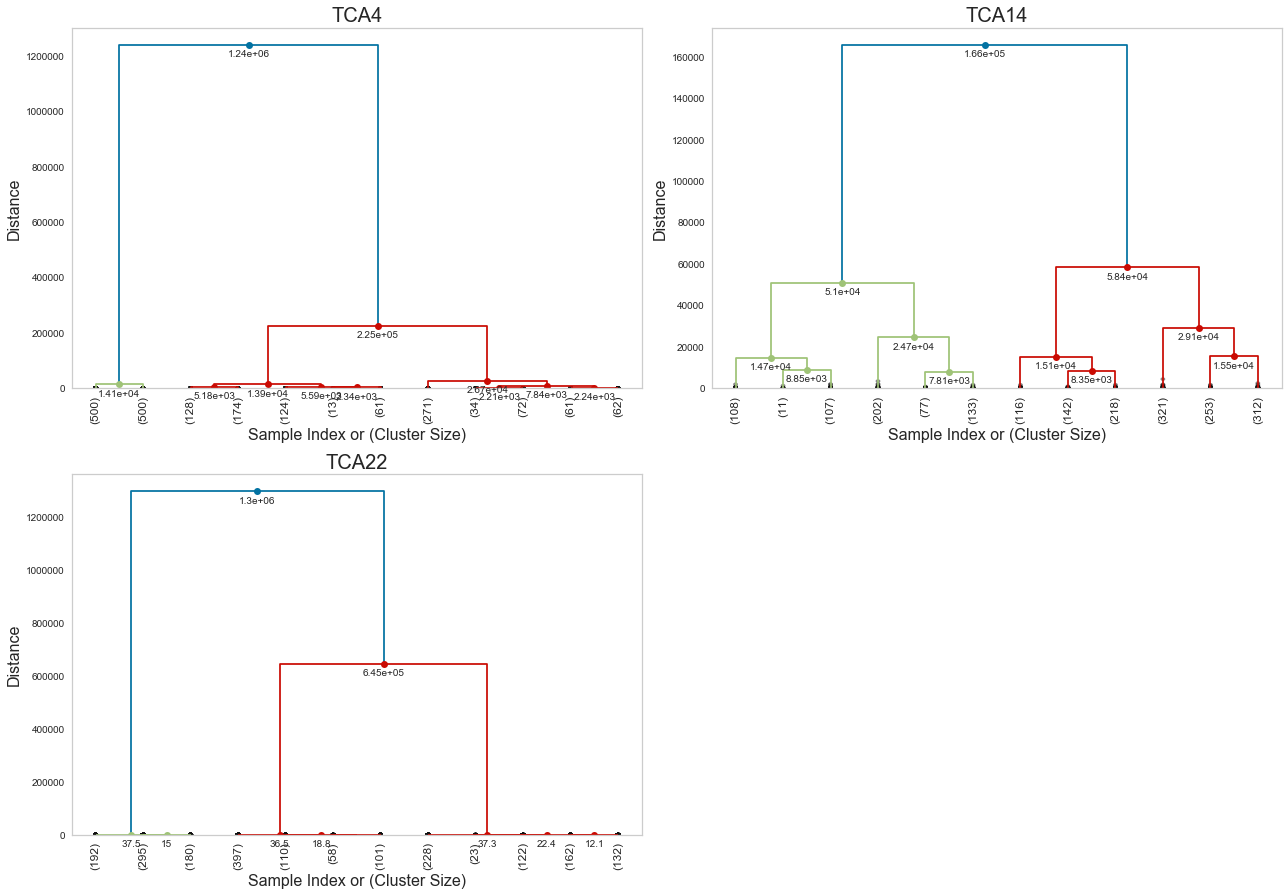

In [15]:
plt.figure(figsize=(18, 18)) 

plt.subplot(3, 2, 1)
tca4_condensed = squareform(dist_tca4)

fancy_dendrogram(
    sch.linkage(tca4_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca4 = plt.gca()
ax_tca4.grid(False)
plt.title('TCA4', fontsize=20)
plt.ylabel('Distance', fontsize=16)


plt.subplot(3, 2, 2)
tca14_condensed = squareform(dist_tca14)

fancy_dendrogram(
    sch.linkage(tca14_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca14 = plt.gca()
ax_tca14.grid(False)
plt.title('TCA14', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 3)
tca22_condensed = squareform(dist_tca22)

fancy_dendrogram(
    sch.linkage(tca22_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_tca22 = plt.gca()
ax_tca22.grid(False)
plt.title('TCA22', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.tight_layout()

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.923659271121027
For n_clusters = 3 The average silhouette_score is : 0.956647375987226
For n_clusters = 4 The average silhouette_score is : 0.9363963702918725
For n_clusters = 5 The average silhouette_score is : 0.9182420944167511
For n_clusters = 6 The average silhouette_score is : 0.8412153389898307
For n_clusters = 7 The average silhouette_score is : 0.8376365407270063
For n_clusters = 8 The average silhouette_score is : 0.8173598921960447
For n_clusters = 9 The average silhouette_score is : 0.8484065639503185


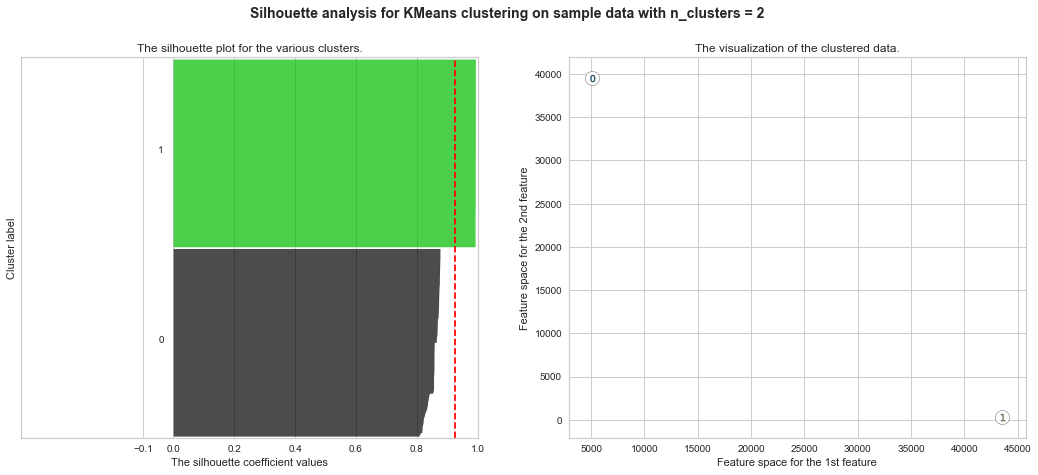

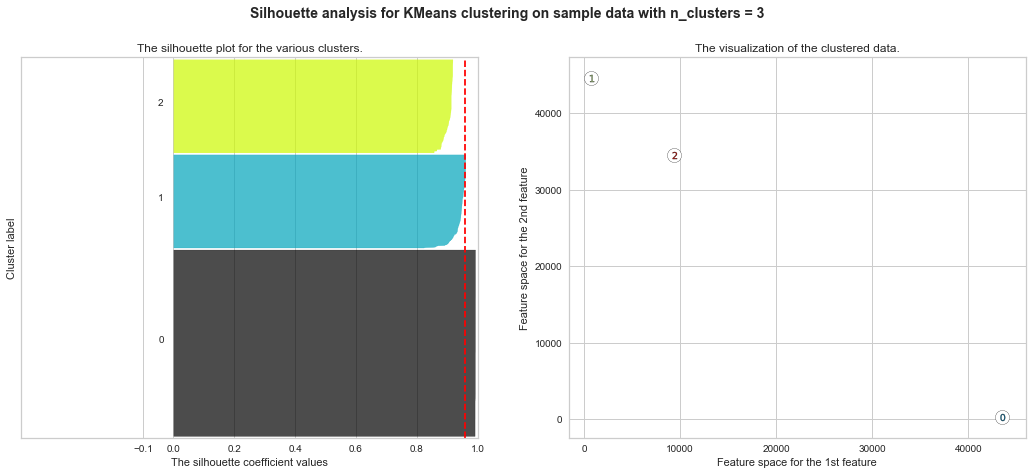

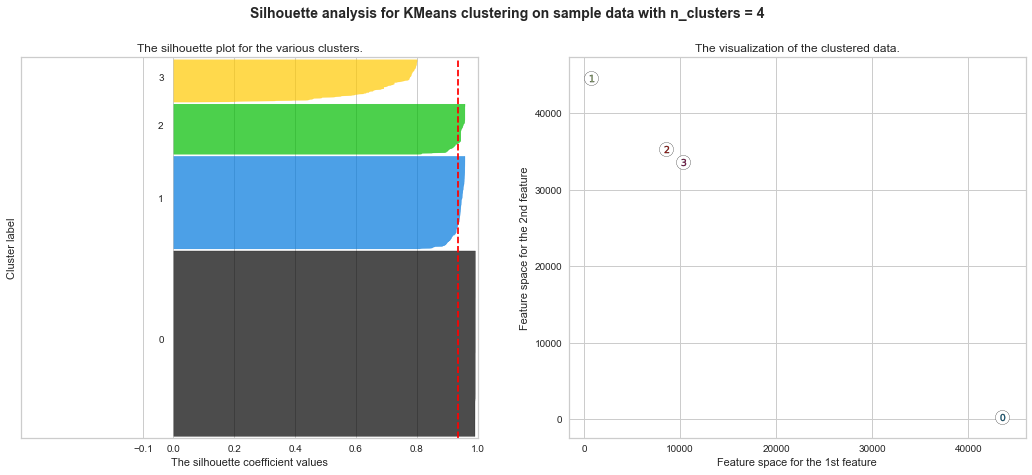

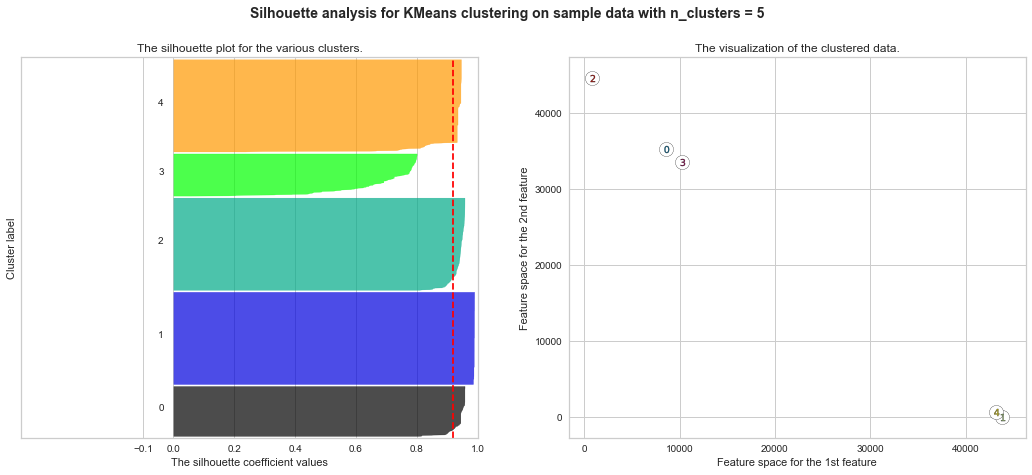

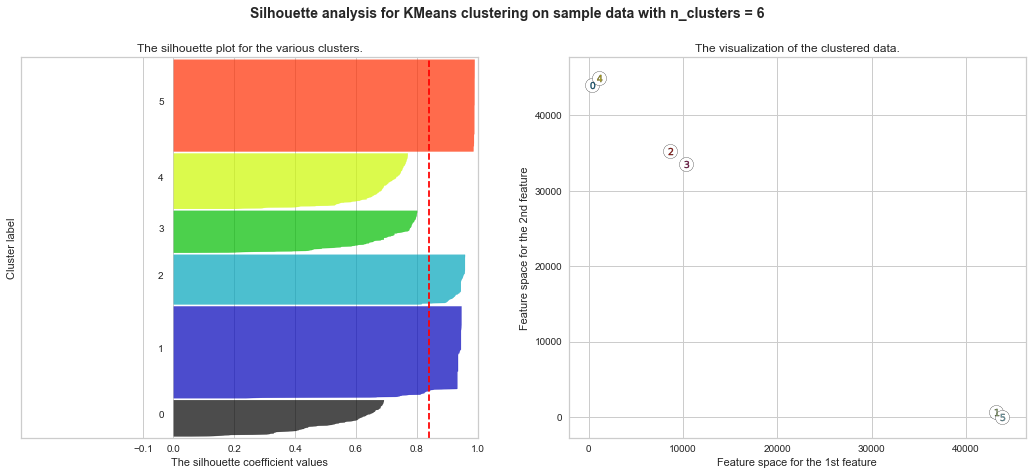

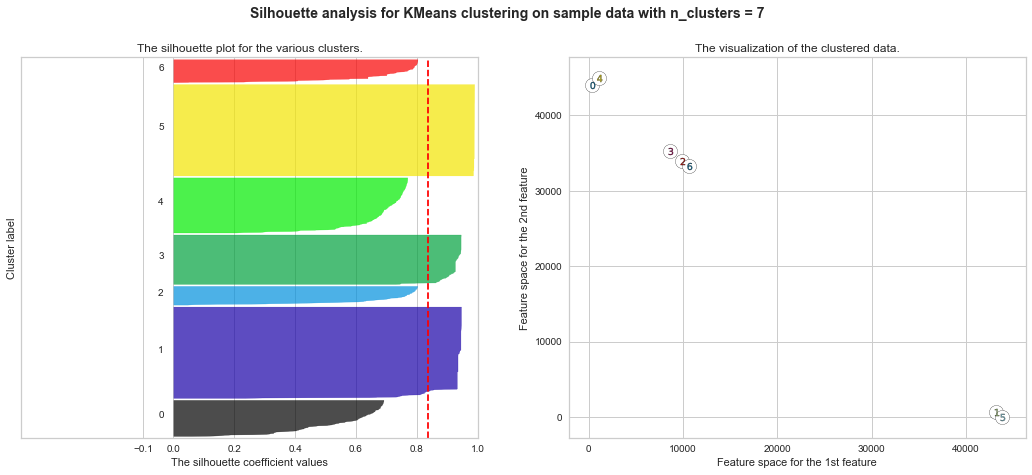

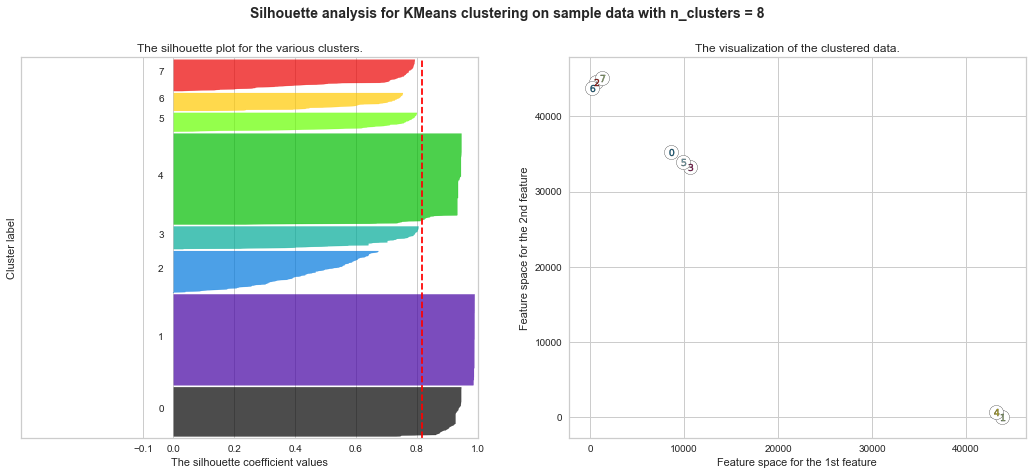

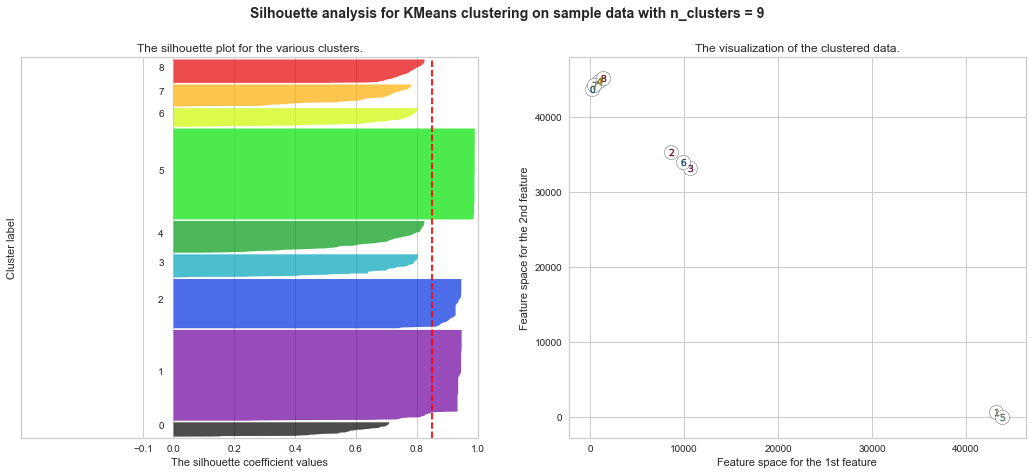

In [37]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dist_tca4) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dist_tca4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dist_tca4, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dist_tca4, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()